In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
raw_df = pd.read_csv('../data/raw/hotel_booking_cancellation_prediction.csv')
clean_df = pd.read_csv('../data/cleaned/hotel_booking_cancellation_prediction_cleaned.csv')

Raw shape: (10000, 34)
Cleaned shape: (9855, 38)

Missing values in raw data:
 stays_in_weekend_nights       13
country                       50
reserved_room_type           324
agent                       1361
company                     9451
adr                          812
stays_in_weeks_nights      10000
dtype: int64

Missing values in cleaned data:
 Series([], dtype: int64)


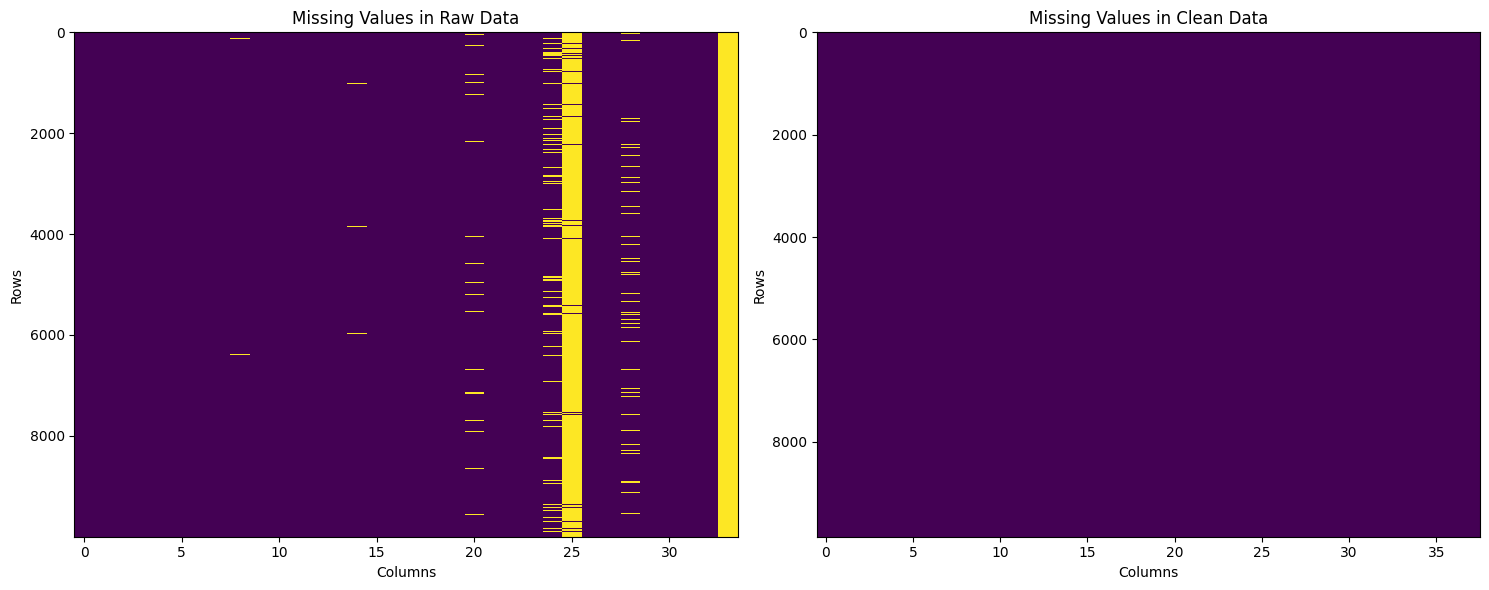

In [5]:
# Analyze the shapes of the raw and cleaned dataframes
raw_shape = raw_df.shape
clean_shape = clean_df.shape

print("Raw shape:", raw_shape)
print("Cleaned shape:", clean_shape)


# Analyze the missing values in the raw and cleaned dataframes
raw_missing = raw_df.isnull().sum()
clean_missing = clean_df.isnull().sum()

print("\nMissing values in raw data:\n", raw_missing[raw_missing > 0])
print("\nMissing values in cleaned data:\n", clean_missing[clean_missing > 0])


# Create the matrices for heatmaps (True = NaN, False = not NaN)
raw_nan = raw_df.isna().values
clean_nan = clean_df.isna().values

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for raw data
axs[0].imshow(raw_nan, aspect='auto', cmap='viridis', interpolation='none')
axs[0].set_title('Missing Values in Raw Data')
axs[0].set_ylabel('Rows')
axs[0].set_xlabel('Columns')

# Heatmap for cleaned data
axs[1].imshow(clean_nan, aspect='auto', cmap='viridis', interpolation='none')
axs[1].set_title('Missing Values in Clean Data')
axs[1].set_ylabel('Rows')
axs[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()


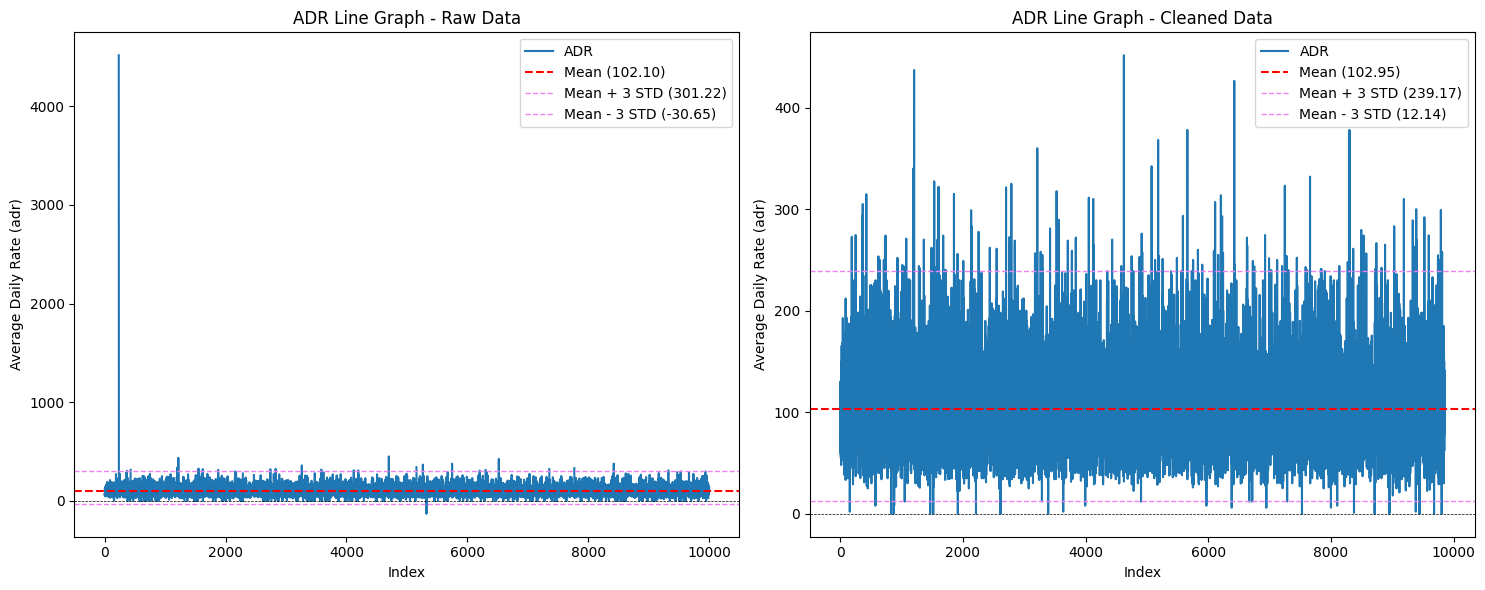

In [6]:
# Analyze the 'adr' column

# Calculate the mean and std for raw data
adr_mean_raw = raw_df['adr'].mean()
adr_std_raw = raw_df['adr'].std()

# Calculate the mean, std
adr_mean_plus_std_raw = adr_mean_raw + 3*adr_std_raw
adr_mean_minus_std_raw = adr_mean_raw - 2*adr_std_raw

# Calculate the mean and std for cleaned data
adr_mean_clean = clean_df['adr'].mean()
adr_std_clean = clean_df['adr'].std()

# Calculate the mean, std
adr_mean_plus_std_clean = adr_mean_clean + 3*adr_std_clean
adr_mean_minus_std_clean = adr_mean_clean - 2*adr_std_clean


fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Grafic raw
axs[0].plot(raw_df['adr'], label='ADR')
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[0].axhline(adr_mean_raw, color='red', linestyle='--', label=f'Mean ({adr_mean_raw:.2f})')
axs[0].axhline(adr_mean_plus_std_raw, color='violet', linewidth=1, linestyle='--', label=f'Mean + 3 STD ({adr_mean_plus_std_raw:.2f})')
axs[0].axhline(adr_mean_minus_std_raw, color='violet', linewidth=1, linestyle='--', label=f'Mean - 3 STD ({adr_mean_minus_std_raw:.2f})')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Average Daily Rate (adr)')
axs[0].set_title('ADR Line Graph - Raw Data')
axs[0].legend()

# Grafic clean
axs[1].plot(clean_df['adr'], label='ADR')
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axhline(adr_mean_clean, color='red', linestyle='--', label=f'Mean ({adr_mean_clean:.2f})')
axs[1].axhline(adr_mean_plus_std_clean, color='violet', linewidth=1, linestyle='--', label=f'Mean + 3 STD ({adr_mean_plus_std_clean:.2f})')
axs[1].axhline(adr_mean_minus_std_clean, color='violet', linewidth=1, linestyle='--', label=f'Mean - 3 STD ({adr_mean_minus_std_clean:.2f})')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Average Daily Rate (adr)')
axs[1].set_title('ADR Line Graph - Cleaned Data')
axs[1].legend()

plt.tight_layout()
plt.show()


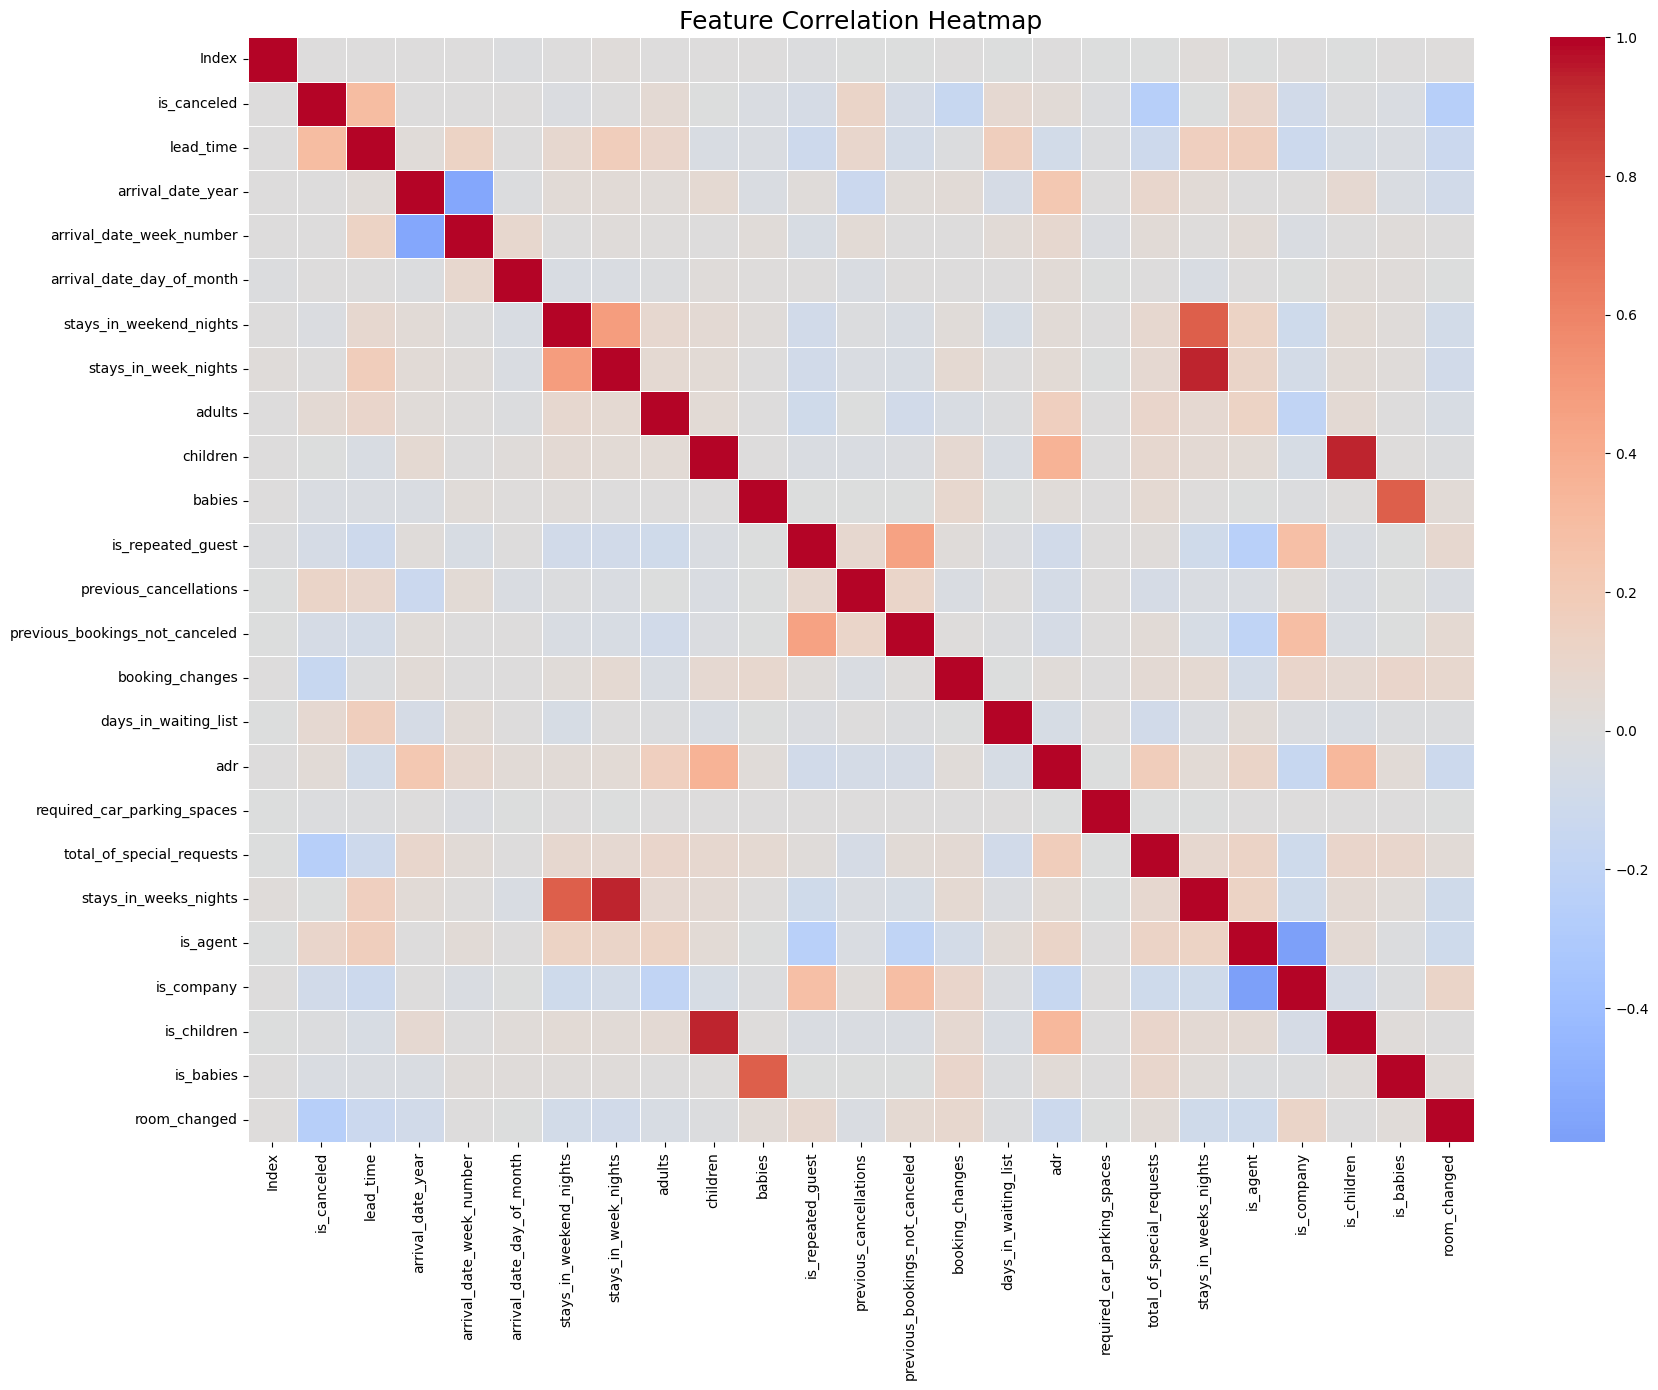

In [ ]:
# Correlation

numerical_df = clean_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Feature Correlation Heatmap', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()